# Taming Text

In [1]:
%matplotlib inline
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk # if some package missing run nltk.downloads()
from nltk.sentiment import util
import gensim

import networkx as nx
import community
import itertools

/Users/lugrinclaire/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/Users/lugrinclaire/anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


## Exercise 1

##### Raw Mail Text Analysis

In a first place we explored the raw email text in order to extract a wordcloud before and after pre-processing. This corpus will thus contain email content as well as email header and meta-information.

In [2]:
# Load the data and obtain text
path = 'hillary-clinton-emails/Emails.csv'
file = pd.read_csv(path) # read csv email files
raw_text = ' '.join(np.array(file.RawText)) # concatenate all text contained in RawText field

In [3]:
def makeWordCloud(text, title):
    """Function to generate wordcloud images"""
    wordcloud = WordCloud().generate(text)
    
    plt.figure(figsize = [10,5])

    # Display the generated image
    plt.subplot(121)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)

    # Mximize font size in image
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.subplot(122)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title + ', Bounded Text Size')
    plt.show()

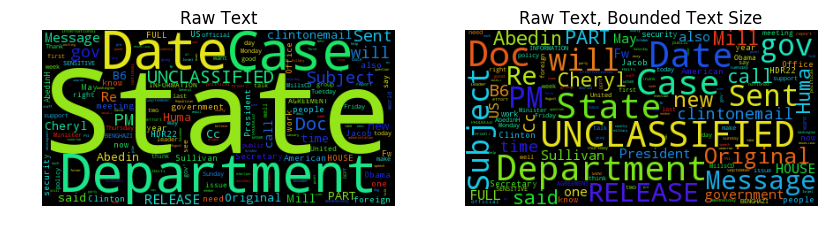

In [4]:
# 1) GENERATE WORD CLOUD FROM RAW CORPUS
makeWordCloud(raw_text, 'Raw Text')

Our pre-processing pipeline consists of several steps:
    <li> tokenization: we separate our corpus in tokens
    <li> term normalization: put everything in lower case
    <li> stopword removal: we remove linker english words as well as ponctuation
    <li> stemming: we keep only roots of the words to avoid redundancies
    <li> lemmatization: we group different inflected forms a word to be considered as a single word


In [5]:
# 2) TEXT-PREPROCESSING PIPELINE
def preprocessText(text,display = False):
    """Text pre-processing function"""
    
    # Tokenization (identification of words)
    tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(tokens)
    not_pre_processed_text = ' '.join(np.array(nltk_text)) # create not preprocessed corpus for later display

    # Term normalization (remove capital letters)
    text_normalized = [w.lower() for w in nltk_text] 

    # Stopword removal (remove linker words as well as ponctuation)
    stopWords = nltk.corpus.stopwords.words('english') + ['.',',','(', ')','&','-',':',';', '...', '"', '<', '>', "'",
                                                          '@', 'b6','docx',"'s",']','[',"'m",'am','pm',"n't",'!','?',
                                                          '%','\\','-',"``",'#', "--", "\'\'", "—"]
    text_stopfiltered = [e.lower() for e in text_normalized if not e in stopWords]

    # Stemming 
    stemmer = nltk.stem.PorterStemmer()
    text_stemmed = [stemmer.stem(word) for word in text_stopfiltered]

    # Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text_lemmatized = [lemmatizer.lemmatize(word) for word in text_stemmed]

    pre_processed_text_list = text_lemmatized
    pre_processed_text = ' '.join(np.array(text_lemmatized)) # concatenate all text contained in RawText field

    # Display the original text and the preprocessed text
    if display:
        print('RAW TEXT \n')
        print(not_pre_processed_text[:1000])
        print('\nPRE-PROCESSED TEXT \n')
        print(pre_processed_text[:1000])

    return pre_processed_text_list

pre_processed_text_list= preprocessText(raw_text,display = True)
pre_processed_text = ' '.join(np.array(pre_processed_text_list)) # concatenate all text contained in RawText field

RAW TEXT 

UNCLASSIFIED U.S. Department of State Case No . F-2015-04841 Doc No . C05739545 Date : 05/13/2015 STATE DEPT . - PRODUCED TO HOUSE SELECT BENGHAZI COMM . SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS . NO FOIA WAIVER . RELEASE IN FULL From : Sullivan , Jacob J < Sullivan11 @ state.gov > Sent : Wednesday , September 12 , 2012 10:16 AM To : Subject : FW : Wow From : Brose , Christian ( Armed Services ) ( mailto : Christian_Brose @ armed-servic , essenate.govi Sent : Wednesday , September 12 , 2012 10:09 AM To : Sullivan , Jacob J Subject : Wow What a wonderful , strong and moving statement by your boss . please tell her how much Sen. McCain appreciated it . Me too UNCLASSIFIED U.S. Department of State Case No . F-2015-04841 Doc No . C05739545 Date : 05/13/2015 STATE DEPT . - PRODUCED TO HOUSE SELECT BENGHAZI COMM . SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS . NO FOIA WAIVER . STATE-5CB0045247 UNCLASSIFIED U.S. Department of State Case No . F-2015-0

We can see that the preprocessed text seems to contain more meaningful information than the raw data.

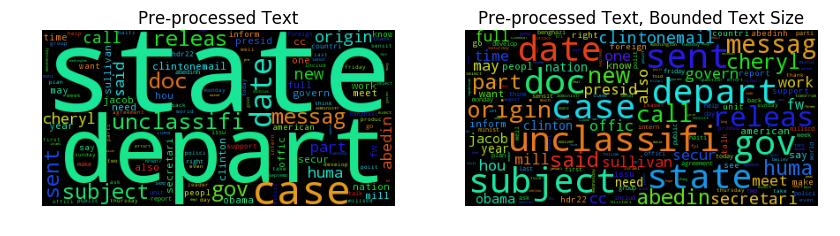

In [6]:
# 3) GENERATE WORD CLOUD FROM PRE-PROCESSED CORPUS
makeWordCloud(pre_processed_text, 'Pre-processed Text')

In fact, when comparing the wordclouds obtained for raw text and preprocessed text we can see important differences. In particular, the pre-processed wordcloud contains word roots that actually carry some important information (such as nouns), where as the raw text is mostly contaminated with generic words.

##### Extracted Mail Text Analysis

We did the same analysis but with the provided field in the corpus called "ExtractedBodyText", which is an attempt to extract actual email content of the RawText field. In this case, we expect no to have contamination from the headers and meta-data.

In [7]:
# Load the data and obtain text
path = 'hillary-clinton-emails/Emails.csv'
file = pd.read_csv(path) # read csv email files
extracted_text = file.ExtractedBodyText.dropna(axis=0)
extracted_text = ' '.join(np.array(extracted_text)) # concatenate all text contained in ExtractedBodyText field

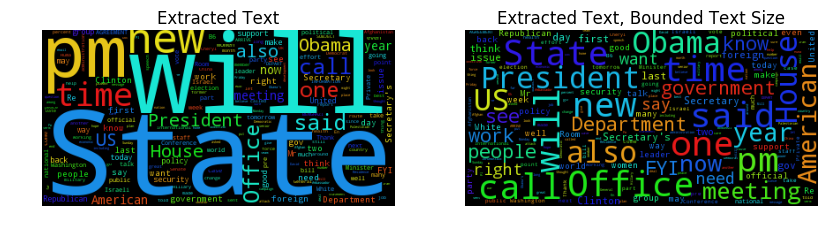

In [8]:
# 1) GENERATE WORD CLOUD FROM RAW CORPUS
makeWordCloud(extracted_text, 'Extracted Text')

In [9]:
# 2) PREPROCESS TEXT

pre_processed_extracted_text_list= preprocessText(extracted_text,display = False)
pre_processed_extracted_text = ' '.join(np.array(pre_processed_extracted_text_list)) # concatenate all text contained in RawText field

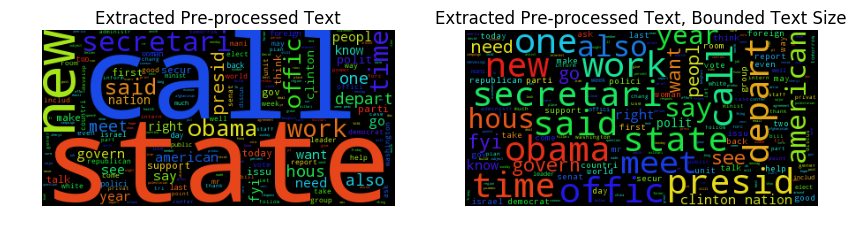

In [10]:
# 3) GENERATE WORD CLOUD FROM PRE-PROCESSED CORPUS
makeWordCloud(pre_processed_extracted_text, 'Extracted Pre-processed Text')

In this case, we obtain even better results than when using the whole content of the raw text. Although state is still the most used word, we can identify several words of primary importance in US politics: flight, Syria, Lybia, Qaddafi, Arab...
Although we might risk missing important information due to an imperfect email body extraction, this approach seems to be more appropriate.

## Exercise 2

In this part of the project we tried to analyze the sentiments that are associated to the different world countries in Hilarry's emails. For that, we tried to find references to countries and perform sentiment analysis with the nltk toolkit mail by mail.

In [11]:
import pycountry
Countries=list(pycountry.countries) #import the countries names

We first created two vectors containing all country IDs. <i>all_country_id</i> is a list of all the different IDs of countries, whereas <i>countries_names</i> is a vector of matching length with standardized country names to later on easily map a country ID to its name.

In [12]:
# Create an array with all the possible id for the countries
all_country_id=[]

# Create an array that has the real name of the country at the index of the id
countries_names=[]

for country in Countries:
    all_country_id.append(country.alpha_2.lower())
    countries_names.append(country.name.lower())
    all_country_id.append(country.alpha_3.lower())
    countries_names.append(country.name.lower())
    all_country_id.append(country.name.lower())
    countries_names.append(country.name.lower())
    # not all the countries have the field "official name"
    if hasattr(country, 'official_name'):
        all_country_id.append(country.official_name.lower())
        countries_names.append(country.name.lower())

We then create two dictionaries of length equal to the number of countries to store the number of occurences of each country in the emails (<i>occurence_countries</i>), and the sentiments associated to each country (<i>sentiment_countries</i>). For the dictionary containing sentiment values , we merely add sequentially the sentiment associated with each email, and divide at the end by the number of occurences to obtain an average sentiment for each country.

In [13]:
# Create a dictionary with all the countries
countries_unique=list(np.unique(countries_names))
values=list(np.zeros((len(countries_unique),), dtype=np.int))

occurence_countries=dict(zip(countries_unique, values))
sentiment_countries=dict(zip(countries_unique, values))

liu_hu_sentiment_countries = dict(zip(countries_unique, values))

Two different approaches to analyze sentiments in each email were applied. 
<ol>
<li><b>Compound sentiment averaging:</b> use the compound sentiment value given by the vader_analyzer of the SentimentIntensityAnalyzer module of the natural language toolkit. -1 values correspond to negative sentiments, 1 to positive sentiments, and 0 scores to neutral emails.</li>
<li><b>Positive and negative word count:</b> count the number of positive and negative words within an email and assign a label (positive or negative) to the email, depending on the most frequent category of words. </li>
</ol>

In [14]:
# Functions to perform sentiment analysis

def get_compound_vader(text):
    """Function to calculate compound sentiment averaging"""
    from nltk.sentiment import SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()
    sentiment_analysis = vader_analyzer.polarity_scores(text)
    
    return sentiment_analysis['compound']

def liu_hu_lexicon(sentence):
    """Function to count positive and negative words and assign corresponding label"""
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank
    
    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1

    if pos_words > neg_words:
        #sentiment = 'Positive'
        sentiment = 1
    elif pos_words < neg_words:
        #sentiment = 'Negative'
        sentiment = -1
    elif pos_words == neg_words:
        #sentiment = 'Neutral'
        sentiment = 0
        
    return sentiment

To obtain our final results we loop email by email and perform the following steps:
    <li> preprocess the email content as in the exercise 1
    <li> extract the countries referred to in the email (by comparing to our country ID vector)
    <li> compute sentiment analysis of the email
    <li> for each country referred to in the email, add +1 in occurence vector, and add sentiment value to sentiment vector

Finally, the sentiment vector is divided by the occurences of each country to obtain an average sentiment score. Countries that do not appear in any of the emails will have nan values.

In [15]:
for email in file.ExtractedBodyText:  # look for each email
    if type(email) == str: # if email content is not nan
        # Preprocess mail
        processed_mail= preprocessText(email,display = False)
        
        # Find countries occuring in the mail
        country_indices = np.unique([all_country_id.index(name) for name in processed_mail if name in all_country_id])
        email_countries = [countries_names[i] for i in country_indices]

        if len(email_countries)>0: # if some country is mentioned in the email do sentiment analysis  
            # Add one to the country occurences
            for country in email_countries:
                occurence_countries[country] = occurence_countries[country] + 1
            # Do sentiment analysis with get_compound_vader
            composite_sentiment = get_compound_vader(email)
            sentiment_countries[country]= sentiment_countries[country] + composite_sentiment
            # Do sentiment analysis with liu_hu_lexicon
            liu_hu_sentiment = liu_hu_lexicon(email)
            liu_hu_sentiment_countries[country] = liu_hu_sentiment_countries[country] + liu_hu_sentiment

# Normalize sentiment values
for country in sentiment_countries:
    sentiment_countries[country] = sentiment_countries[country] / occurence_countries[country]
    
# Normalize sentiment values for liu_hu_lexicon
for country in liu_hu_sentiment_countries:
    liu_hu_sentiment_countries[country] = liu_hu_sentiment_countries[country] / occurence_countries[country] 
    # positive sentiment 
    if liu_hu_sentiment_countries[country] < 0:
        liu_hu_sentiment_countries[country] = -1.0
    # negative sentiment
    elif liu_hu_sentiment_countries[country] > 0:
        liu_hu_sentiment_countries[country] = 1.0

In [93]:
#estimate the time the loop will run based on a run for 50 emails that lasted 2:30 min
len(file.ExtractedBodyText)*4/60/100

5.296666666666666

In [92]:
# save the data to avoid running the whole loop again
np.save('liu_hu_sentiment_countries.npy', dictionary) 
np.save('occurence_countries.npy', dictionary) 
np.save('sentiment_countries.npy', dictionary) 


In [21]:
# Sort our vectors in order of occurence (most to least occurent countries)
occurences_list = list(occurence_countries.values())
countries_list = list(sentiment_countries.keys())

sorted_indexes = sorted(range(len(occurences_list)), key=lambda k: occurences_list[k])
sorted_occurence=[occurence_countries[countries_list[x]] for x in sorted_indexes]
sorted_countries = [countries_list[x] for x in sorted_indexes]
sorted_sentiments=[sentiment_countries[countries_list[x]] for x in sorted_indexes]
sorted_liu_hu_sentiments=[liu_hu_sentiment_countries[countries_list[x]] for x in sorted_indexes]

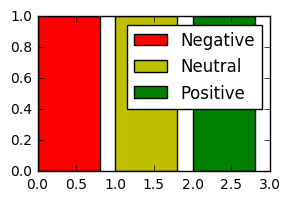

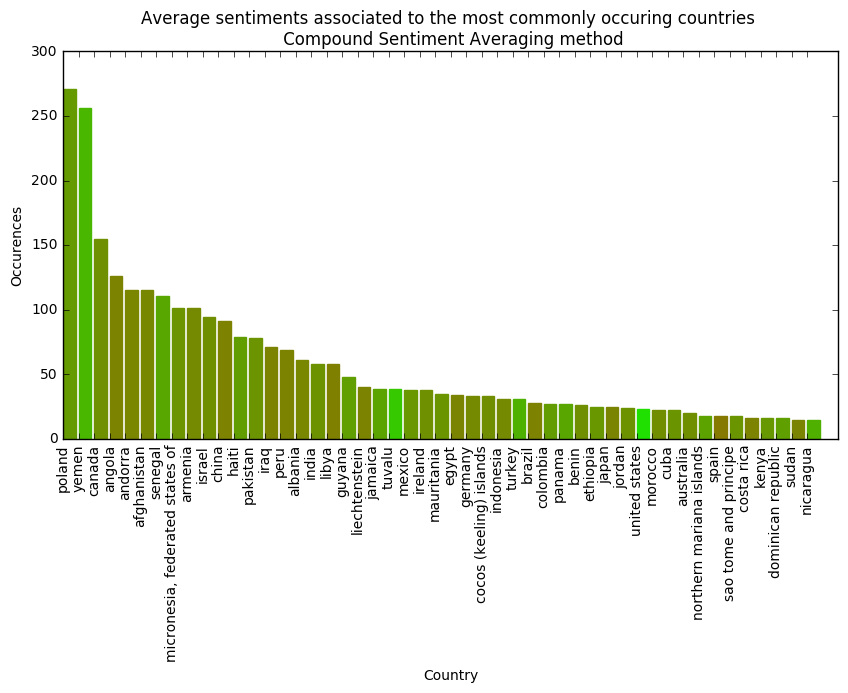

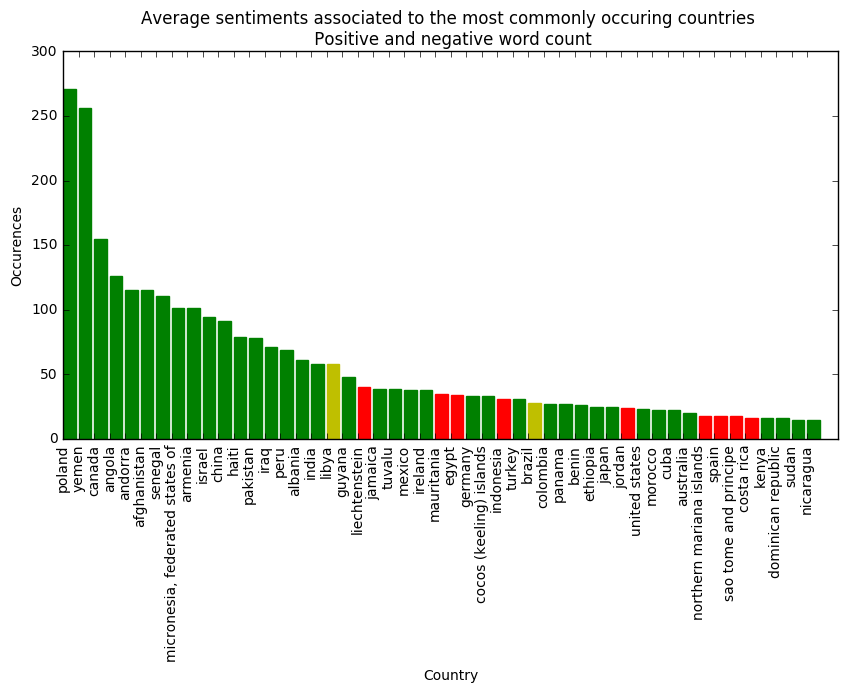

In [56]:
# Prepare vectors for the plot (reverse and cut)
countries_to_plot = 50
toplot_countries = sorted_countries[:-countries_to_plot:-1]
toplot_occurence = sorted_occurence[:-countries_to_plot:-1]
toplot_sentiments = sorted_sentiments[:-countries_to_plot:-1]
toplot_liu_hu_sentiments = sorted_liu_hu_sentiments[:-countries_to_plot:-1]

# Plot legend
plt.figure(figsize = [3,2])
plt.bar([0],[1], color = ['r'])
plt.bar([1],[1], color = ['y'])
plt.bar([2],[1], color = ['g'])
plt.legend(['Negative','Neutral','Positive'])

# Plot method 1)
color_palette = [(x/15.0, x/20.0, 0.0) for x in range(toplot_occurence[0])]
plt.figure(figsize = [10,5])
barlist = plt.bar(range(countries_to_plot-1),toplot_occurence)
plt.xlabel('Country')
plt.ylabel('Occurences')
for i in range(len(barlist)):
    bar_sentiment = toplot_sentiments[i]
    color = ((-bar_sentiment + 1)/2.0,(bar_sentiment + 1)/2.0,0.0)
    barlist[i].set_color(color) 
z = plt.xticks(range(countries_to_plot-1), toplot_countries, rotation='vertical')
plt.title('Average sentiments associated to the most commonly occuring countries \n Compound Sentiment Averaging method')

# Plot method 2)
plt.figure(figsize = [10,5])
barlist = plt.bar(range(countries_to_plot-1),toplot_occurence)
plt.xlabel('Country')
plt.ylabel('Occurences')
for i in range(len(barlist)):
    bar_sentiment = toplot_liu_hu_sentiments[i]
    color = ((-bar_sentiment + 1)/2.0,(bar_sentiment + 1)/2.0,0.0)
    if bar_sentiment > 0:
        color = 'g'
    elif bar_sentiment < 0:
        color = 'r'
    else: 
        color = 'y'
    barlist[i].set_color(color) 
z = plt.xticks(range(countries_to_plot-1), toplot_countries, rotation='vertical')
plt.title('Average sentiments associated to the most commonly occuring countries \n Positive and negative word count')

We can see that both methods yield quite similar results in terms of sentiment type associated. Green colors correspond to positive sentiments, red colors to negative sentiments and yellow or greenish yellow to neutral. We can see for example that Liechtenstein or Egypt tend to have negative sentiments associated. On the other countries like Poland or Yemen tend to have positive sentiments associated. 

We can see however that the second method, since it gives a discrete output (positive/negative/neutral) rather than a scale, can give misleading results. In particular, China seems to have positive sentiments associated, but actually its average associated sentiment is mostly negative.
However the 1st method seems not to capture the differences between countries: most sentiments are around positive or neutral and the negative sentiment are not really represented.

Overall most countries are associated to a positive sentiment.
An interesting thing to see with the 1st method is that the USA are associated with the best sentiment, however not mentionned very often

## Exercise 3

- Run topic modeling over the corpus which consists of taking a number of documents (here emails) and sorting them out into different topics
- Explore different numbers of topics (varying from 5 to 50)

### Create a set containing all emails


In [23]:
email_set = []
for email in file.ExtractedBodyText:  #look for each email
    if type(email) == str: # not taking into account nan
        processed_email = preprocessText(email)
        email_set.append(processed_email)

### Create corpus 

To generate an LDA model, we need to understand how frequently each term occurs within each document. To do that, we need to construct a document-term matrix with gensim. The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics.

In [24]:
# turn emails into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(email_set)

The dictionary must be converted into a bag-of-words. The doc2bow() function converts dictionary into a bag-of-words. Corpus is a list of vectors equal to the number of documents.

In [25]:
# convert emails into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in email_set]

Now can generate an LDA model.

The constructor estimates Latent Dirichlet Allocation model parameters based on a corpus.
num_topics = number of requested latent topics to be extracted from the corpus (parameter that we will vary)
id2word = mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.


### 5 topics

In [72]:
lda_5 = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary)

In [73]:
# topics=-1 to print all topics.
# return 10 words per topic
lda_5.print_topics(num_topics=-1,num_words=10)

[(0,
  '0.009*"call" + 0.007*"work" + 0.006*"would" + 0.005*"know" + 0.005*"see" + 0.005*"one" + 0.005*"want" + 0.005*"u" + 0.004*"get" + 0.004*"also"'),
 (1,
  '0.011*"2010" + 0.008*"h" + 0.006*"state.gov" + 0.005*"would" + 0.005*"2" + 0.004*"1" + 0.004*"print" + 0.004*"clintonemail.com" + 0.004*"pl" + 0.003*"hrod17"'),
 (2,
  '0.006*"state" + 0.005*"obama" + 0.005*"new" + 0.005*"american" + 0.005*"would" + 0.004*"govern" + 0.004*"said" + 0.004*"time" + 0.004*"one" + 0.004*"polit"'),
 (3,
  '0.024*"offic" + 0.024*"secretari" + 0.018*"depart" + 0.014*"meet" + 0.013*"room" + 0.010*"state" + 0.009*"arriv" + 0.008*"rout" + 0.007*"privat" + 0.007*"confer"'),
 (4,
  '0.013*"fyi" + 0.007*"state" + 0.006*"ok" + 0.006*"secretari" + 0.005*"call" + 0.005*"meet" + 0.004*"also" + 0.004*"work" + 0.004*"time" + 0.003*"get"')]

Output:
    
Each row corresponds to a topic containing 10 words. The value in front of each word represent the corresponding weight. When using only 5 topics, the weights seem to be really really low.

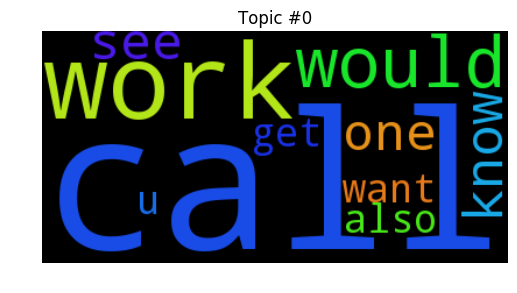

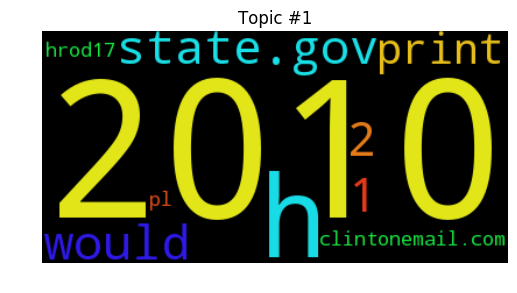

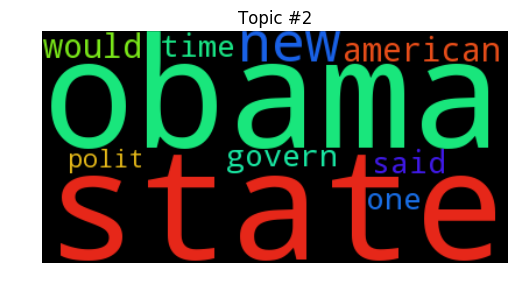

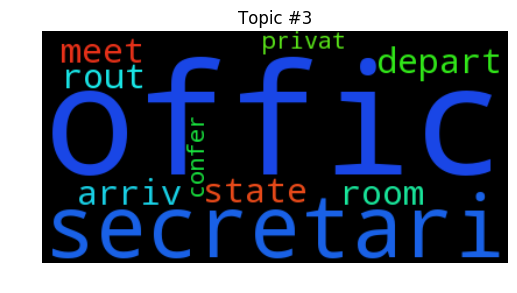

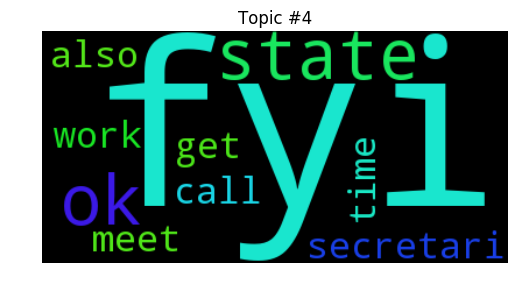

In [74]:
for t in range(lda_5.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda_5.show_topic(t, 10)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

### 25 topics

In [75]:
# generate LDA model
lda_25 = gensim.models.ldamodel.LdaModel(corpus, num_topics=25, id2word = dictionary)

In [76]:
#lda_25.print_topics(-1,10)

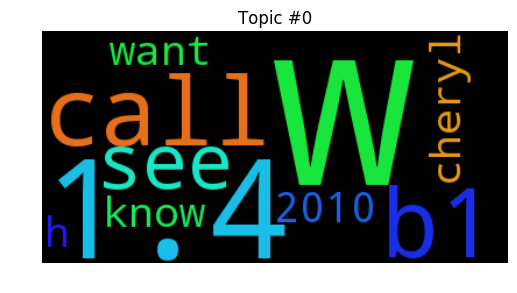

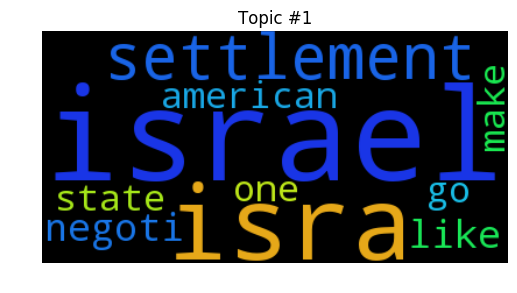

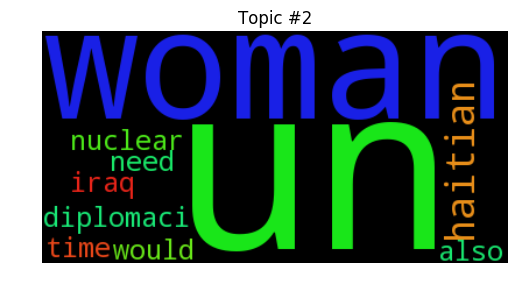

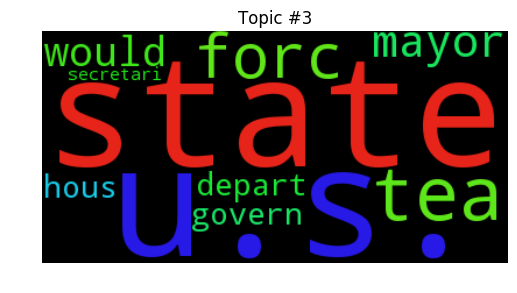

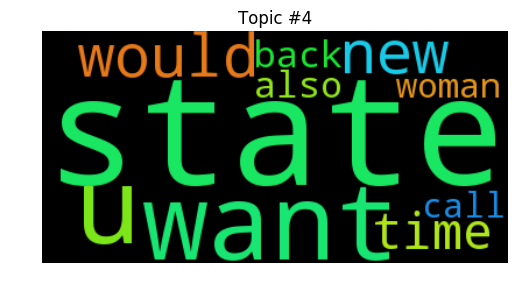

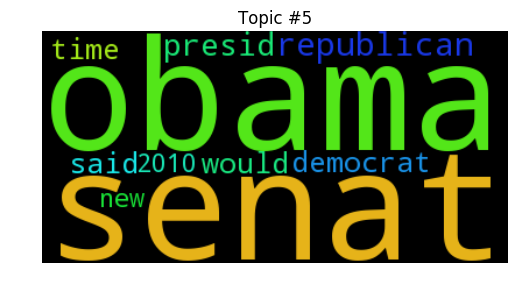

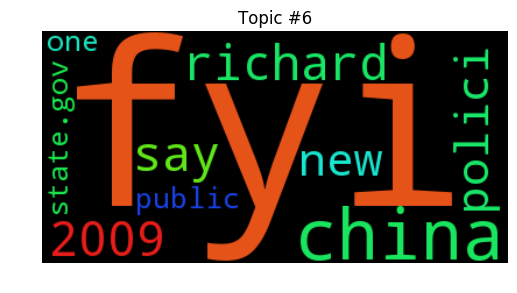

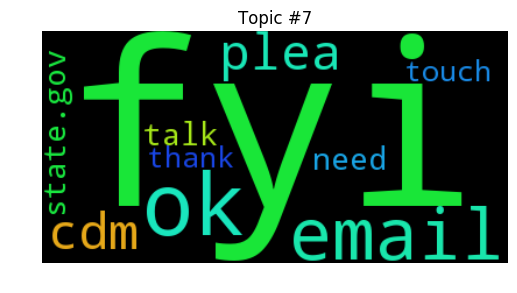

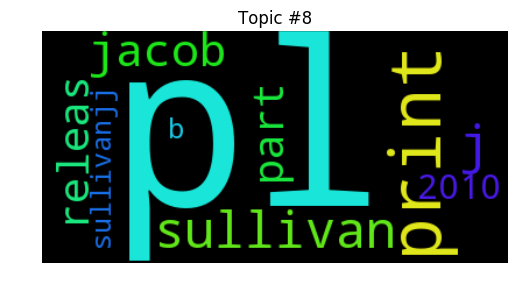

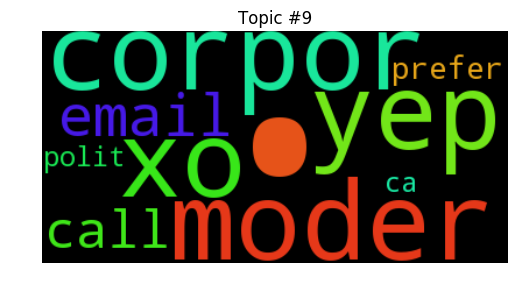

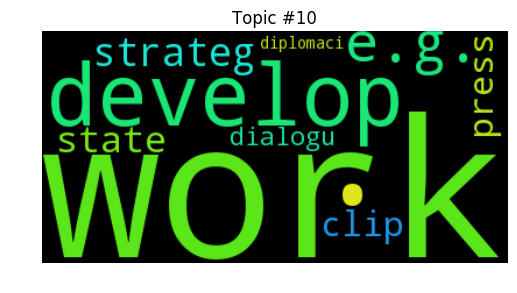

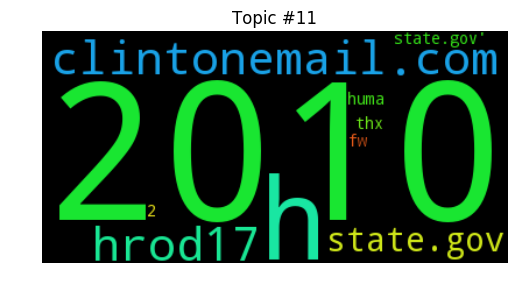

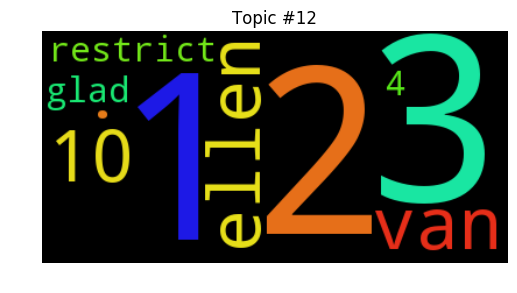

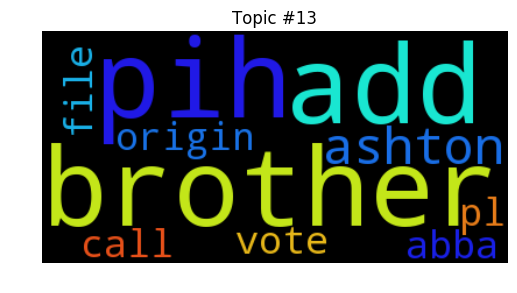

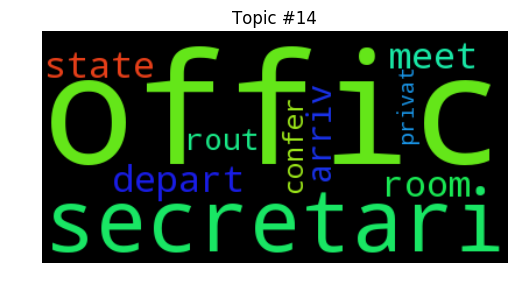

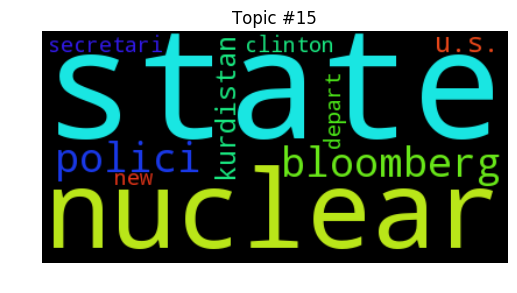

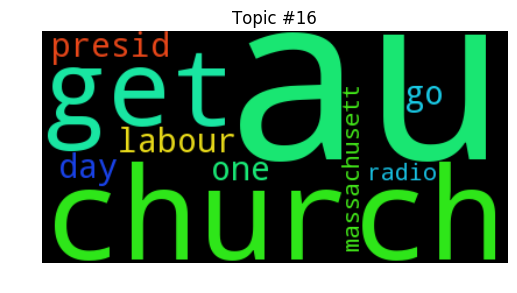

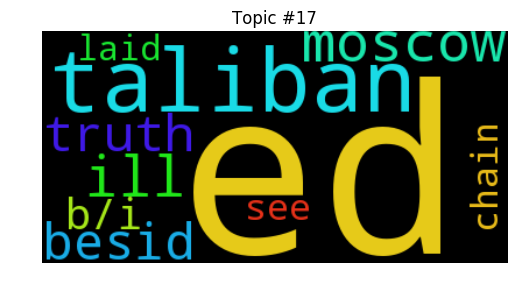

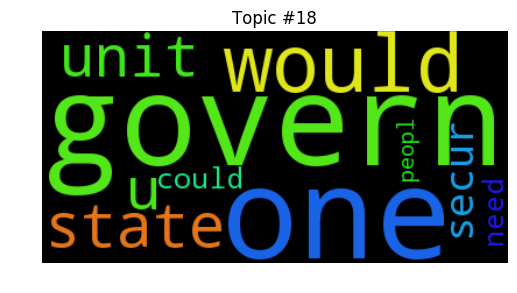

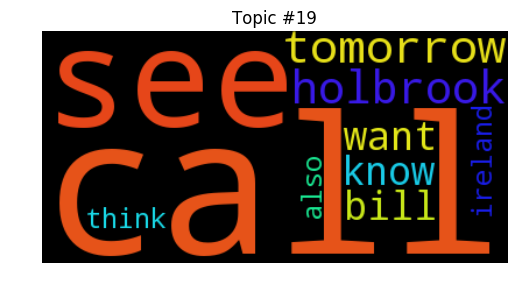

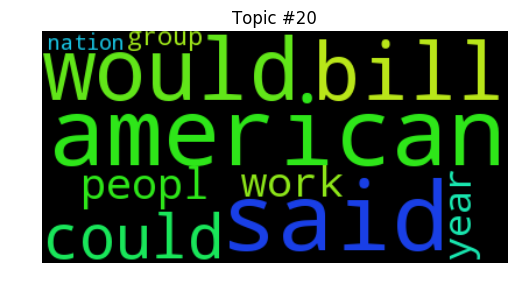

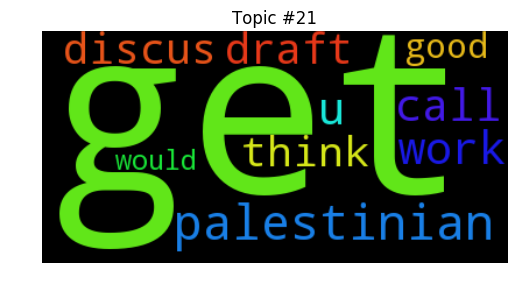

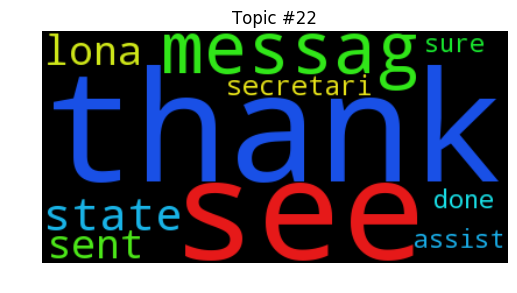

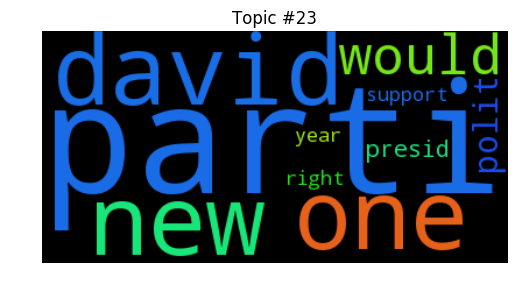

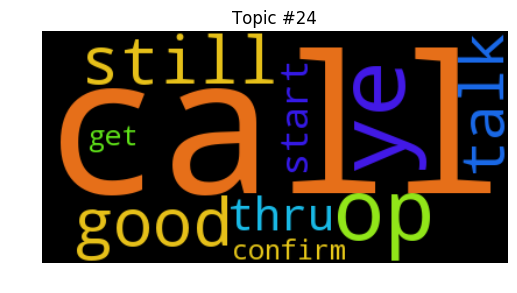

In [77]:
for t in range(lda_25.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda_25.show_topic(t, 10)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

### 50 topics


In [78]:
# generate LDA model
lda_50 = gensim.models.ldamodel.LdaModel(corpus, num_topics=50, id2word = dictionary)

In [79]:
#lda_50.print_topics(-1,10)

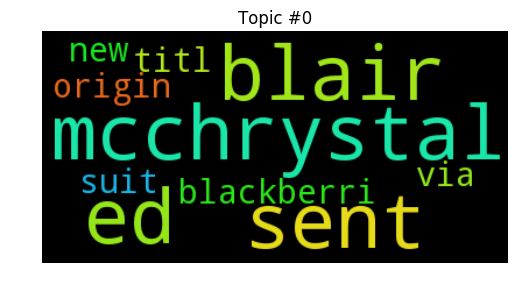

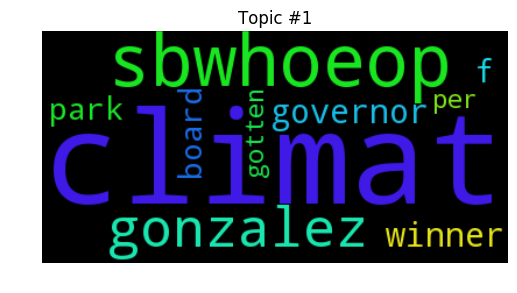

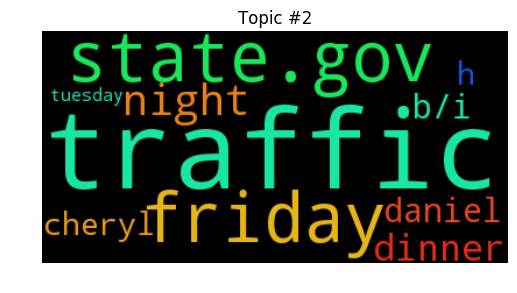

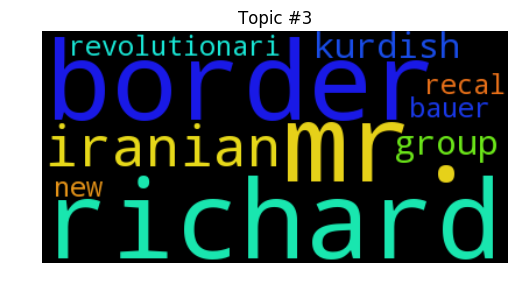

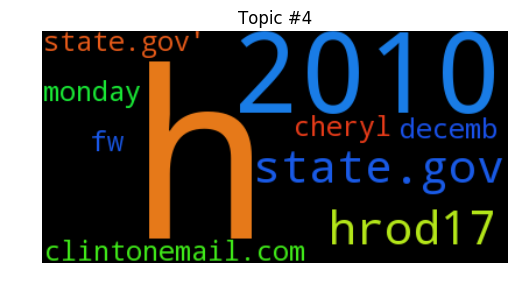

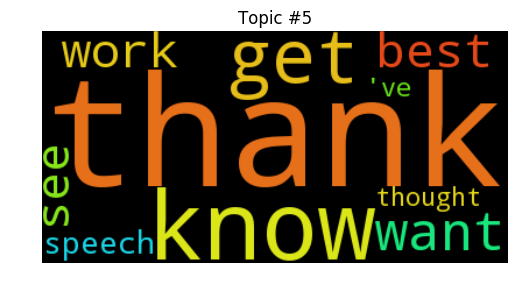

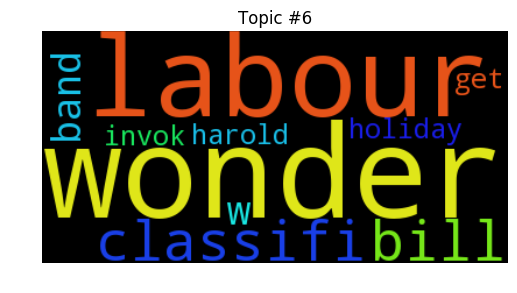

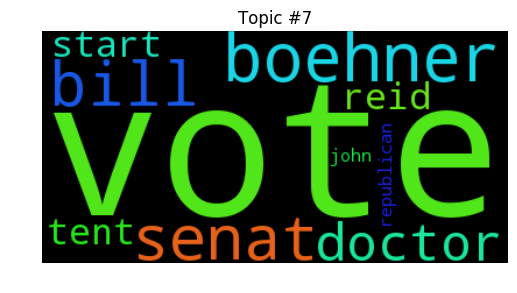

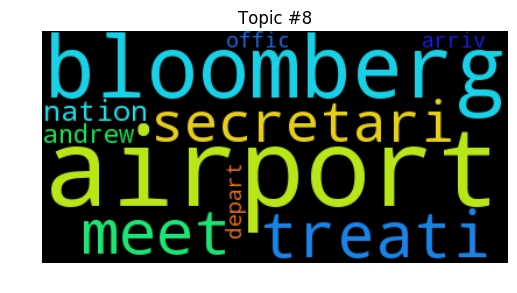

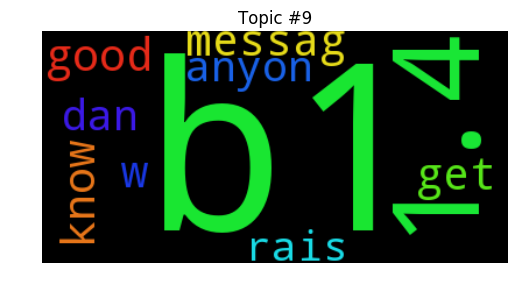

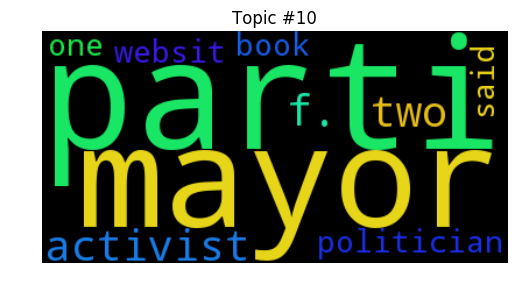

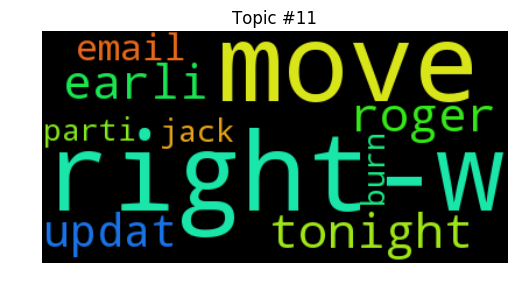

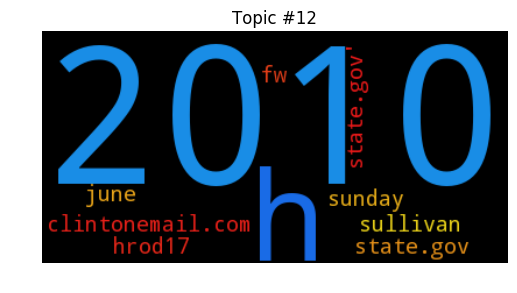

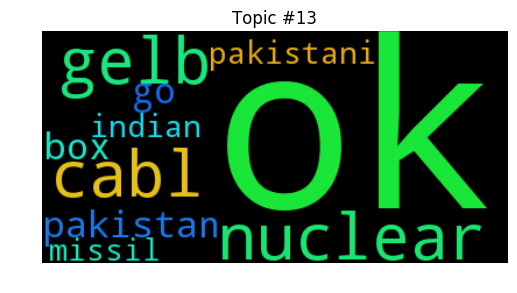

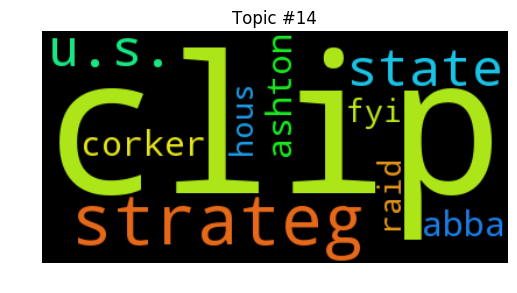

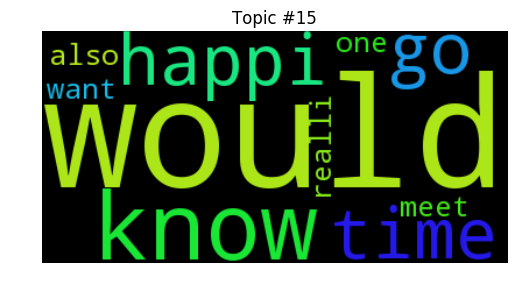

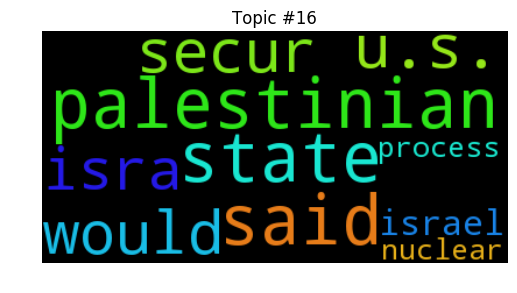

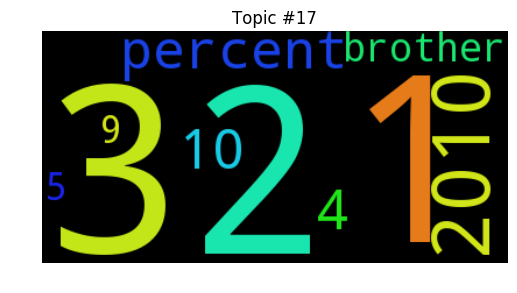

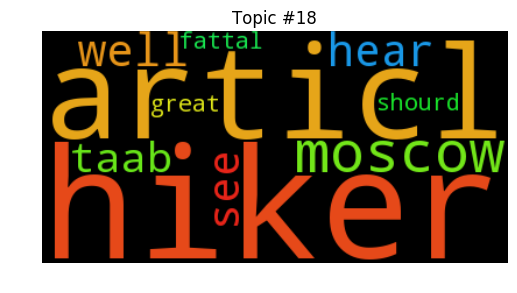

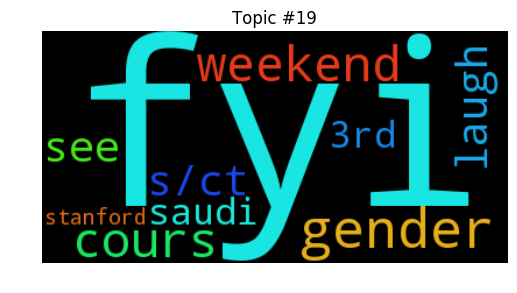

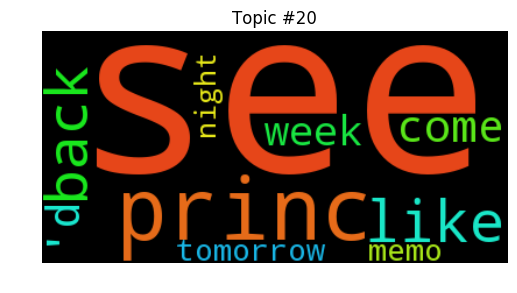

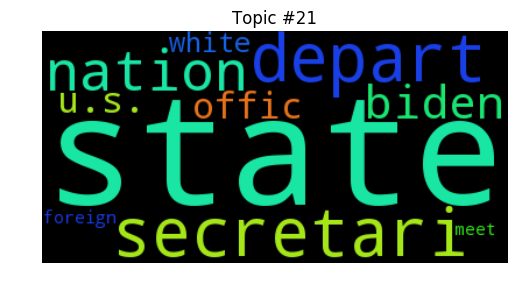

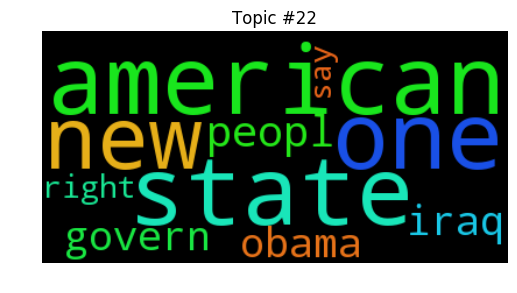

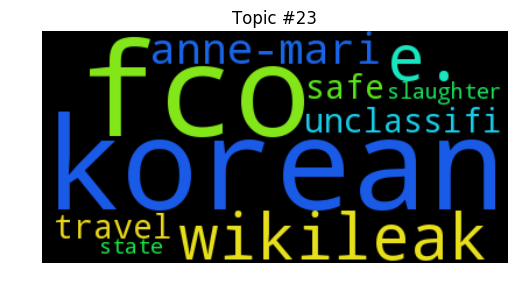

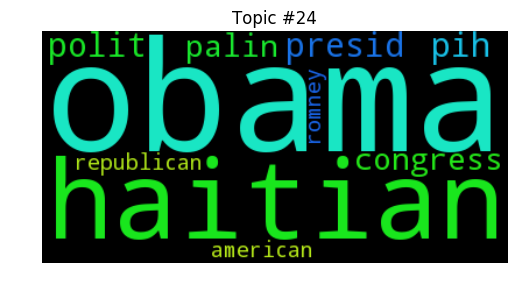

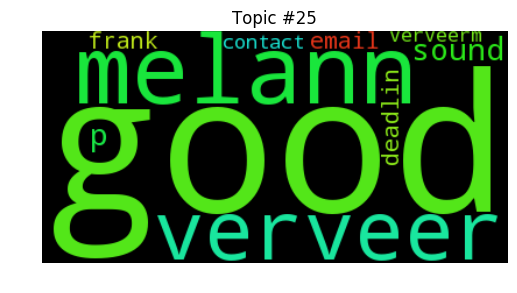

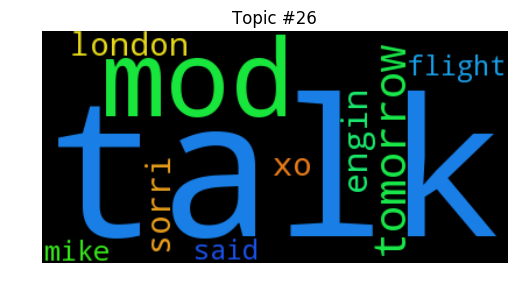

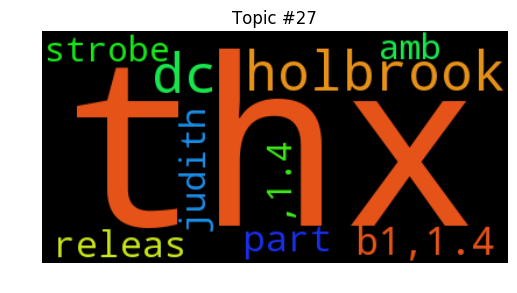

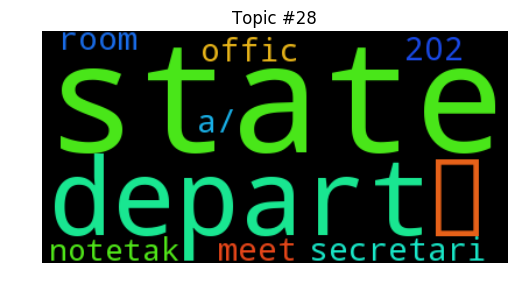

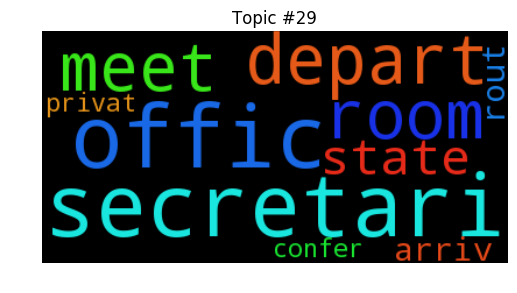

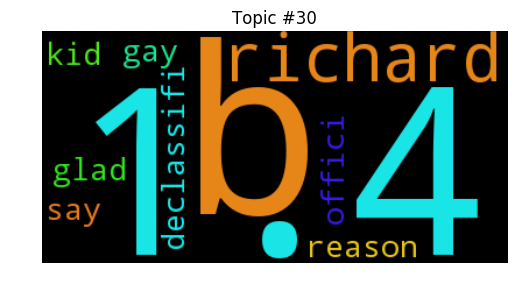

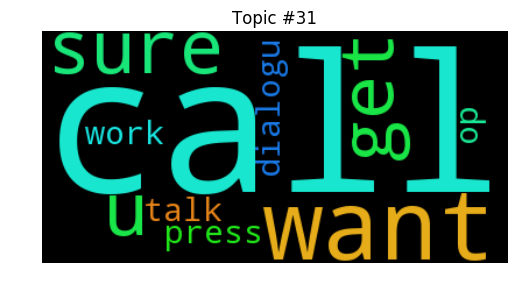

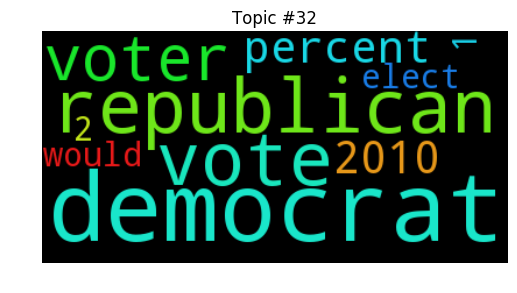

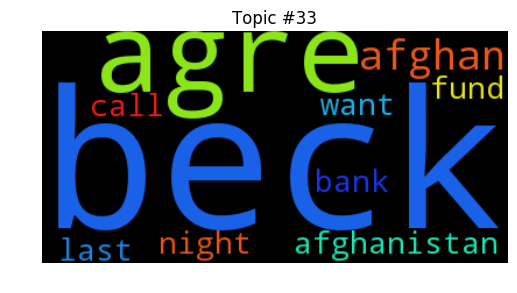

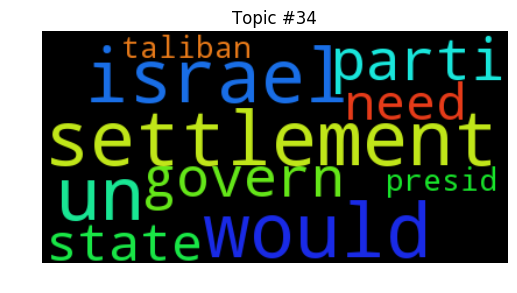

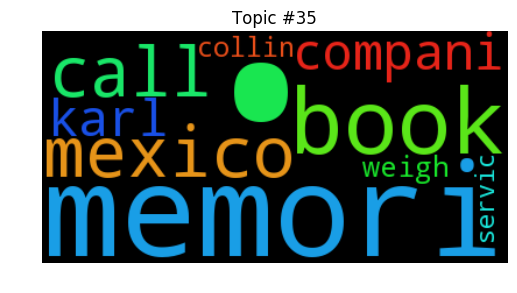

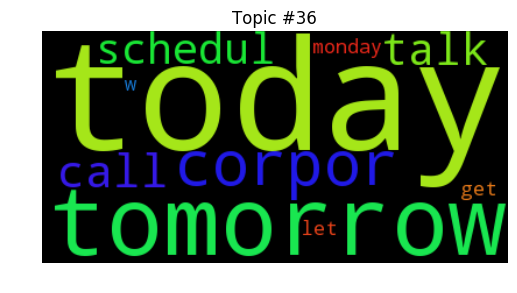

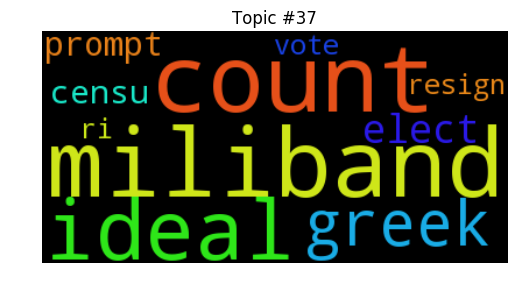

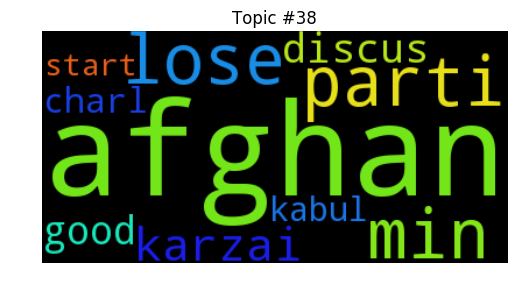

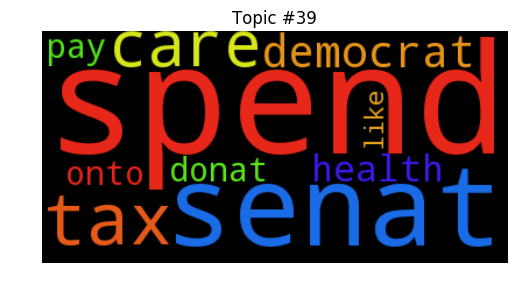

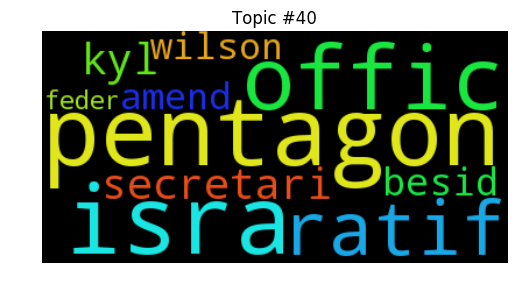

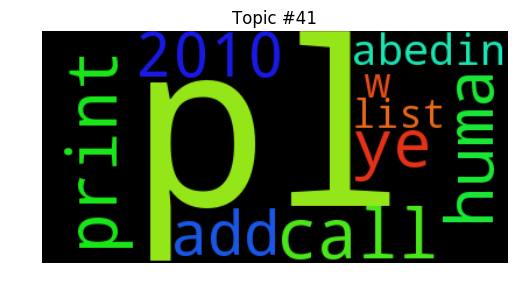

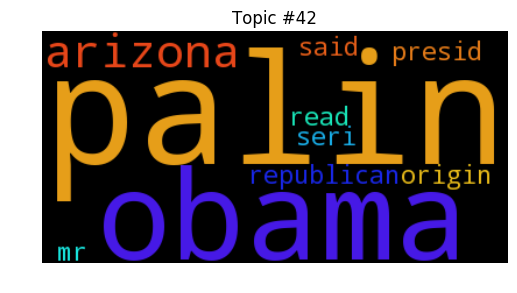

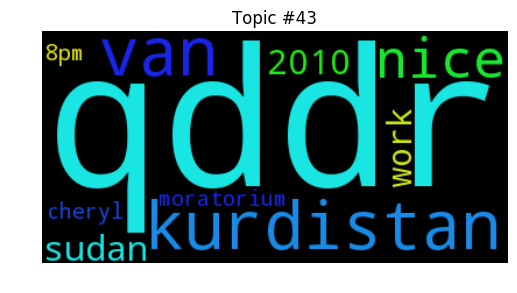

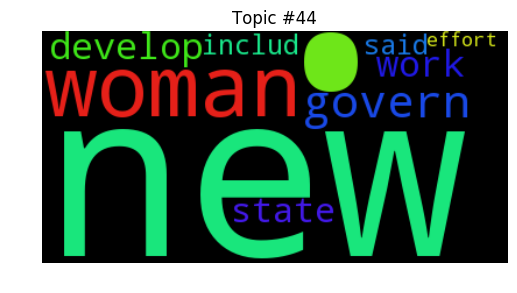

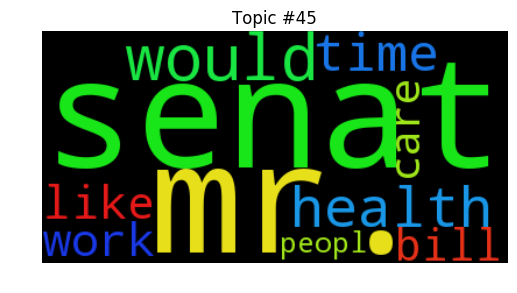

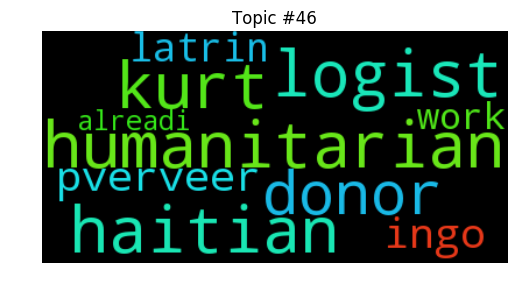

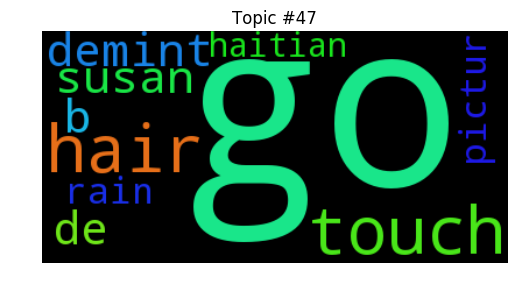

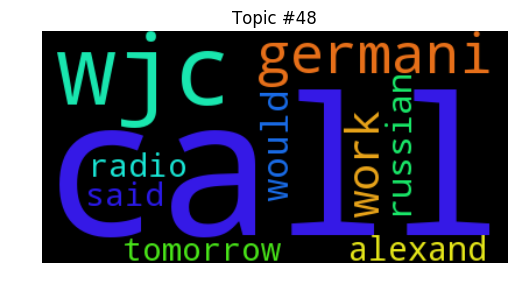

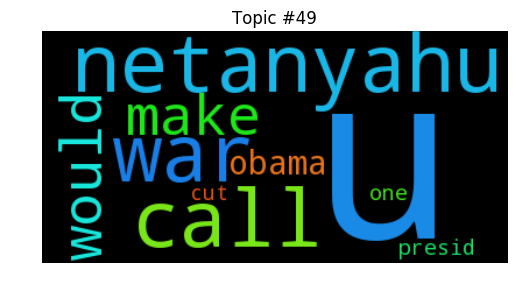

In [80]:
for t in range(lda_50.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda_50.show_topic(t, 10)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

It is quite difficult to find out keywords to summarize each topic. However, we can clearly see that some topics are more related to the secretaria, others to the security, arm or economy.

Increasing the number of topics seems to have an impact on the weight of each word. Larger values can be found with a higher number of topics. Which might show that having a larger number of topic gives more accurate set of words.

# Exercice 4: BONUS

In this exercice we build a graph of how people who receive emails from Hillary Clinton are connected. We consider that people are connected if they receive the same email from Clinton (they are in cc of the email).

In the file EmailReceivers.csv we have for each email the id of each person that received it. In the file Persons.csv we can track back the name of each person from their id.


### Load the data

In [35]:
# load the table with the people that received an email and the email ID
path = 'hillary-clinton-emails/EmailReceivers.csv'
receivers = pd.read_csv(path) # read csv email files

path = 'hillary-clinton-emails/Persons.csv'
persons = pd.read_csv(path) # read csv email files

In [36]:
receivers.head()

Id  EmailId  PersonId
0   1        1        80
1   2        2        80
2   3        3       228
3   4        3        80
4   5        4        80

In [37]:
persons.head()

Id                          Name
0   1                111th Congress
1   2  AGNA USEMB Kabul Afghanistan
2   3                            AP
3   4                      ASUNCION
4   5                          Alec

### Build the nodes

In [39]:
# start building the graph: build a node for each person that received an email
G=nx.Graph()
# the nodes are the person hillary sends email to
G.add_nodes_from(persons.Id)

### Build the Edges

In [42]:
# create the edge:  there is one edge when hillary sent the same email to two people
# this means the email Id appeared in several rows

# create a list of all the pair of people 
Edges=list()

for i in np.unique(receivers.EmailId):
    # if several people received this email
    if len(list(receivers.PersonId[receivers.EmailId==i]))>=2:
        #extend the list with all possible pairs of people who received the same email
        Edges.extend(list(itertools.combinations(list(receivers.PersonId[receivers.EmailId==i]), 2)))
        
# add the edges to the graph
G.add_edges_from(Edges)

In [43]:
len(Edges)==G.number_of_edges()
# the graph doesn't add twice the same edge

False

### Plot the graph

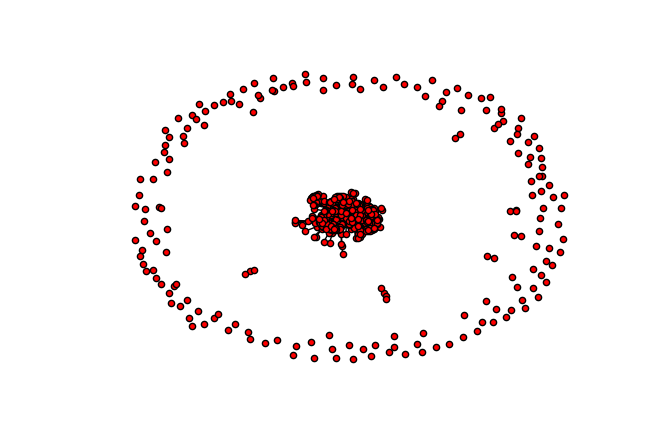

In [44]:
plt.show()
nx.draw(G,node_size=20)

We see here that there are a lot of people that are really well connected (the middle of the graph), but also quite a few that are not connected at all.

We removed the people that had no connections to have a better view

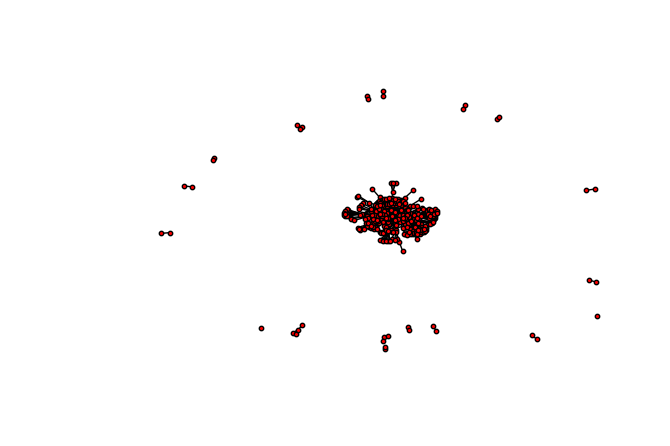

In [45]:
# display only the people that are interconnected: discard the ones on the outer area
connected_people=list(np.unique(Edges))
plt.show()
nx.draw(G,node_size=10,nodelist=connected_people)

Here again we see that there are a few cluster of peoples that are only connected to two other people, and a dense intereconnected amount of people in the middle. It seems that there also are subgroups in the dense middle.

To study these subgroups we need to perform a community analysis

### Partition the data into communities

In [54]:
# find the structures in the graph
partition = community.best_partition(G)

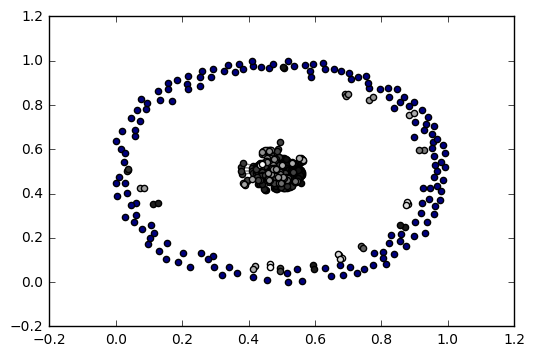

In [55]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

Because of the people that are unconnected we again cannot clearly see the communities that were identified.
We do the analysis again without the people unconnected

In [69]:
# repeat the analysis with only people that are connected
G2=nx.Graph()
new_nodes=list(np.unique(Edges))
G2.add_nodes_from(new_nodes)
G2.add_edges_from(Edges)

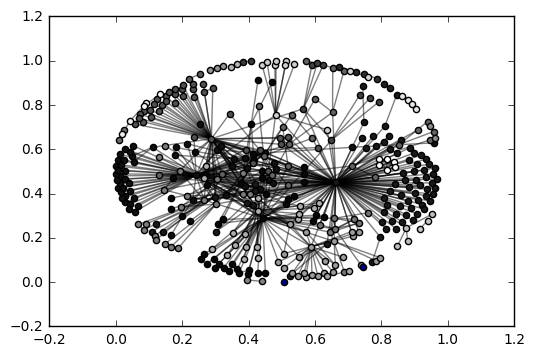

In [70]:
# find the structures in the graph
partition2 = community.best_partition(G2)
#drawing
size = float(len(set(partition2.values())))
pos = nx.spring_layout(G2)
count = 0.
for com in set(partition2.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition2.keys()
                                if partition2[nodes] == com]
    nx.draw_networkx_nodes(G2, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G2,pos, alpha=0.5)
plt.show()


In this graph we can clearly see community. For example groups of people are all connected to the same center people, some groups are very interconnected some other not. There are people that are connected with a large number of others and act as hubs. 

In [98]:
# find the number of communities
len(np.unique(list(partition2.values())))

31

The best partition identified 31 groups of person in our graph